# Simple Linear Regression

Simple linear regression is used when we want to assess the relationship between two scale variables, where one is considered to be an independent variable (IV) and the other is a dependent variable (DV). We use the assumed linear (straight line) relationship between our two variables to allow us to fit a regression model, using the ordinary least squares method, and then use scores on the IV to predict scores on the DV. In a simple linear regression model we have a DV and only one IV. This allows us to plot the relationship between our variables using the Cartesian axis plane, where we plot the IV on the x-axis and the DV on the y-axis using a scatter plot. Regression models make use of the equation for a straight line (y = mx + b). Where y is our score on the DV, m is the slope of the line (can be negative or positive), x is a score on the IV, and b is the intercept or point at which the regression line crosses the y-axis when we input a value of 0 for x (the IV). 

In this notebook I will demonstrate a couple of ways to run a simple linear regression model using python. Specifically, I will obtain a regression plot for our data using the seaborn library, then use the statsmodels software library to fit a regression model and obtain the parameters and statistics of interest to interpret the model (relationship between our variables). I will also demonstrate how to run the same analysis using the pingouin software library. Both methods are similar to implement and quite straight forward. 

The data I will use comes from a datafile used by Tabachnik & Fidell (2001) in their textbook 'Using Multivariate Statistics'. The data file is about women's health and was recorded from female residents of Los Angeles in 1976. The variables of interest for this regression analysis are an IV called 'stress' and a DV called 'menheal'. The stress IV is a scale variable measuring a participant's stress level. This variable was calculated as a weighted measure of the number and importance of life change units over one year, high scores indicate more stressful life events. The menheal DV is a scale variable measuring the frequency count of the number of mental health problems experienced by participant's in that same year. With this regression analysis we are looking to see if stress is a predictor of the number of mental health problems experienced by the participants. 



In [1]:
# Importing key software libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pingouin as pg

In [2]:
# Importing the data for analysis. 

df = pd.read_csv('health.csv')

df.head()

,timedrs,phyheal,menheal,stress,religion,race
0,1,5,8,265,3,1
1,3,4,6,415,3,1
2,0,3,4,92,2,1
3,13,2,2,241,1,1
4,15,3,6,86,4,1


We can see above that the IV (stress) and DV (menheal) are integer values measured on some scale. Firstly we can use the seaborn regplot method to visualise the data with a regression line fitted. 

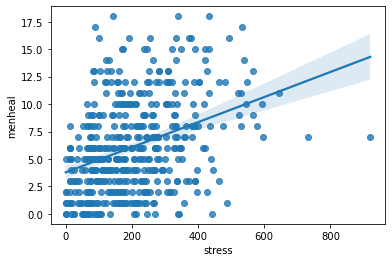

In [3]:
sns.regplot(data = df, x = 'stress', y = 'menheal')
plt.show()

The above regression plot shows a weak linear trend between the stress IV and mental health DV. There is a large spread of menheal scores over scores on the stress variable below 400. Most datapoints have a stress score of 400 or lower. There also appears to be a couple of participants with quite extreme stress scores (above 700) that don't have particularly high scores on menheal. These values are likely influencing the slope of the regression line and the overall fit of the model and we may want to use the various regression diagnostic tests for influence and outliers to remove these scores. Despite these values and the spread of menheal scores at lower stress values we can still see that the regression line is indicating an upward pattern in the data where menheal scores increase as scores on the stress variable increase. We can also see the shaded area around the regression line representing the 95% Confidence Intervals for the line. These are quite narrow at lower stress values but widen considerably as stress values increase. This is likely because the position of the regression line is being influenced by the couple of extreme scores, and there are fewer datapoints with which to assess the slope as the the stress scale increases in value. Given this plot we would most likely want to check the data meets the assumptions of a regression model and perform some diagnostic tests before being confident in our interpretation of the regression model coefficients. As I have covered these topics in other notebooks, here we will fit the regression model and look at the output on the data as we see it plotted here.  

In [4]:
# Fitting a linear regression model using statsmodels. Here we use a method that allows us to use R style formulas
# to fit the regression model. 

mod_1 = smf.ols('menheal ~ stress', data = df).fit()

mod_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                menheal   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     73.34
Date:                Sat, 02 Sep 2023   Prob (F-statistic):           1.63e-16
Time:                        11:12:56   Log-Likelihood:                -1291.7
No. Observations:                 465   AIC:                             2587.
Df Residuals:                     463   BIC:                             2596.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7904      0.327     11.594      0.000       3.148       4.433
stress         0.0114      0.001      8.564      0.000       0.009       0.014
==============================================================================
Omnibus:                       20.649   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.670
Skew:                           0.540   Prob(JB):                     1.19e-05
Kurtosis:                       2.936   Cond. No.                         443.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The statsmodels output table contains various useful statistics to help interpret the results of our model. First, we can assess whether the model is significant using the F-value. In this case we get an F-value of 73.34 and an associated probability of p < 0.001. This indicates that fitting the model is better than just using the mean value of menheal when trying to predict menheal based on stress scores. In a simple linear regression where we only have one IV this tells us that the IV (stress) is a significant predictor of menheal scores. Next, if we look at the part of the table containing coefficients we can see that the coefficient (coef) for the stress IV is 0.0114. This is the slope of the regression line. This is not a very steep slope but that fact that it is a positive value tells us that as stress scores are increasing so are menheal scores. The t-value, in the coefficients table, associated with the stress variable also confirms what we knew from the significant F-test. That stress is a significant predictor of menheal scores. Here t = 8.56 with a probability of p < 0.001. If we were conducting multiple regression and had more than one IV, then each IV would have an associated t-value that would help us to interpret whether that variable was contributing signficantly to our regression model and could be used to predict scores on the DV. When there is only one IV, like here, the t-value will be the square root of the F-value for the model. The last thing worth checking in the output is the R-squared value that gives us some sort of indication of how well the model fits the data. In this case we have an R-squared value of 0.137. This suggests that about 13.7% of the variability in menheal scores can be explained by stress scores. So, there are obviously a lot of other factors (variables) that predict menheal scores beyond stress. This tells us that although we have a significant model and we can predict menheal scores using stress scores, there is a lot of noise in the data and stress is not a great predictor of menheal. This fits with our interpretation of the regression plot. We could see that there was a lot of niose in the data and menheal scores varied considerable at all levels of the stress scale. 

To formally report the above statistics we would use the following formats:

- F-Value: F(1, 463) = 73.34, p < 0.001
- t-Value: t(463) = 8.56, p < 0.001
- Formula for the regression line: menheal = 3.79 + 0.011 * stress (y = a + bx (a = intercept; b = slope of the line))

In [5]:
# We can obtain the statsmodels output for the regression model in the same format as the R programming language
# by using the print function. 

print(mod_1.summary())

                            OLS Regression Results                            
Dep. Variable:                menheal   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     73.34
Date:                Sat, 02 Sep 2023   Prob (F-statistic):           1.63e-16
Time:                        11:20:02   Log-Likelihood:                -1291.7
No. Observations:                 465   AIC:                             2587.
Df Residuals:                     463   BIC:                             2596.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7904      0.327     11.594      0.0

### The same model using pingouin

We can perform the same regression analysis using the pingouin software library

In [6]:
mod_2 = pg.linear_regression(df['stress'], df['menheal'])
mod_2.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,3.79,0.33,11.59,0.0,0.14,0.13,3.15,4.43
1,stress,0.01,0.00,8.56,0.0,0.14,0.13,0.01,0.01


Note that the pingouin output returns only the coefficients table and doesn't give us an F-value for the overall significance of the model. This is not a problem with this linear regression model as we can still see that the IV is a significant predictor by inspecting the t-value and associated significance level. The fatc that this is significant tells us that our model is signficant. When conducting multiple regression, where we have a number of IVs, pingouin does have some other useful functionality in that it has lethods that allow us to partition the R-squared value so that we can see the relative importance of predictors in our model. 


## Summary:

- Simple linear regression allows us to model the relationship between a scale IV and a scale DV using the equation for a straight line. The regression model can be used to assess whether the IV can be used to predict scores on the DV. 
- When we have only one IV it is useful to plot the variables using a scatterplot and we can fit a regression line to visualise the relationship prior to fitting our model. Visualisation will also highlight any potential issues with our data that we might wish to address before interpreting the results of the regression. 
- Regression models can be fitted using the statsmodels software library or pingouin software library. 

